# Credit Card Fraud Detection

Banks and financial institutions are greatly concerned about the occurrence of credit card fraud. Scammers employ diverse methods to illicitly obtain credit card details and conduct unauthorized transactions. This undertaking involves examining a dataset comprising credit card transactions and constructing predictive models to identify fraudulent activities.

We will utilize the Credit Card Fraud Detection dataset from Kaggle, which encompasses credit card transactions executed by cardholders in Europe. The dataset encompasses a total of 284,807 transactions, of which 492 are identified as fraudulent. To maintain confidentiality, the dataset solely comprises numerical input variables resulting from Principal Component Analysis (PCA) transformations. The included features consist of 'Time', 'Amount', 'V1' through 'V28', and the 'Class' variable, which signifies whether a transaction is fraudulent (1) or not (0).

The project will commence with exploratory data analysis (EDA) to gain deeper insights into the data. Subsequently, data processing and modeling will be conducted, entailing the construction of various classification models to forecast instances of fraudulent transactions. Furthermore, we will address the issue of imbalanced classes by employing undersampling techniques. Lastly, we will assess the models' performance and select the most suitable one based on evaluation metrics such as precision, recall, F1-score, and accuracy.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import (
    precision_score, 
    recall_score,
    precision_recall_curve, 
    f1_score, 
    fbeta_score, 
    accuracy_score
)

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading data
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

## 1.- Exploratory Data Analysis

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


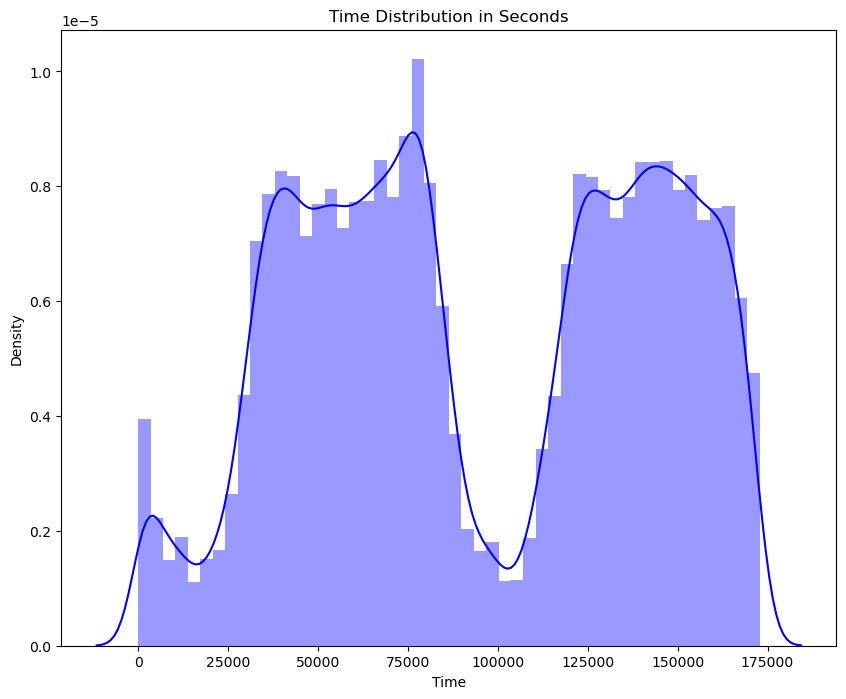

In [10]:
# Plotting distribution of Time feature
plt.figure(figsize=(10,8), )
plt.title('Time Distribution in Seconds')
sns.distplot(df['Time'], color='blue')
plt.show()

As can be seen, the Time feature exhibits a dual-peak distribution, revealing two distinct time periods within a day when credit card transactions occur more frequently. The initial peak manifests at approximately 40,000 seconds (equivalent to around 13 hours), whereas the second peak emerges at roughly 120,000 seconds (equivalent to approximately 33 hours). This observation implies the existence of a potential pattern in the timing of credit card transactions, which could be valuable for detecting fraudulent activities.

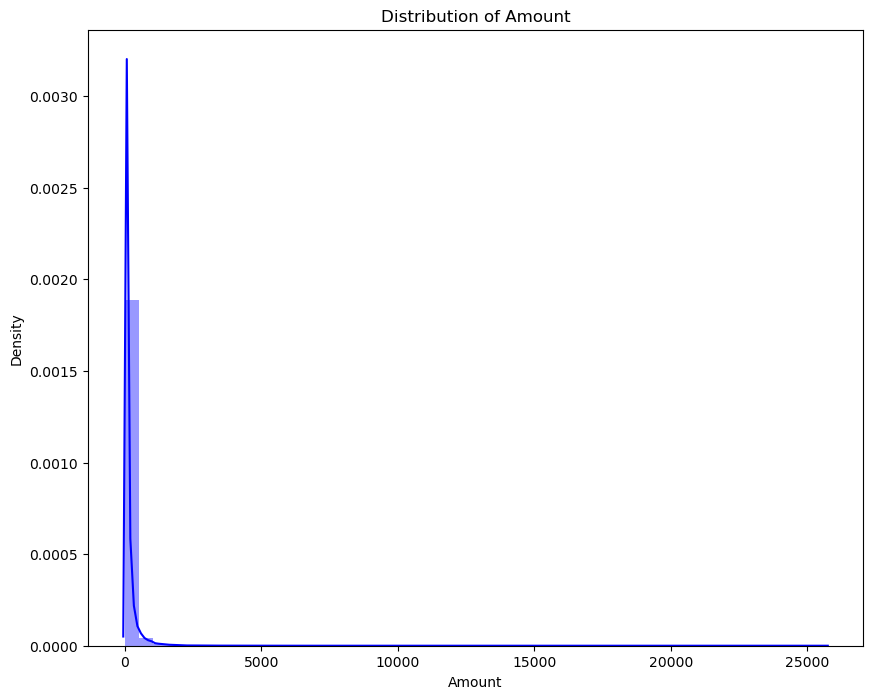

In [11]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'], color='blue')
plt.show()

Based on the plot, it is evident that the Amount attribute exhibits a pronounced right-skewed distribution, characterized by an elongated tail on the right side. This implies that the majority of transactions involve small amounts, while a small number of transactions involve exceptionally large amounts. Consequently, it is evident that the dataset includes certain outliers in relation to transaction amounts. Thus, when constructing a fraud detection model, it might be imperative to address these outliers within the Amount attribute. This could be accomplished through techniques such as applying a logarithmic transformation or employing robust statistical approaches.

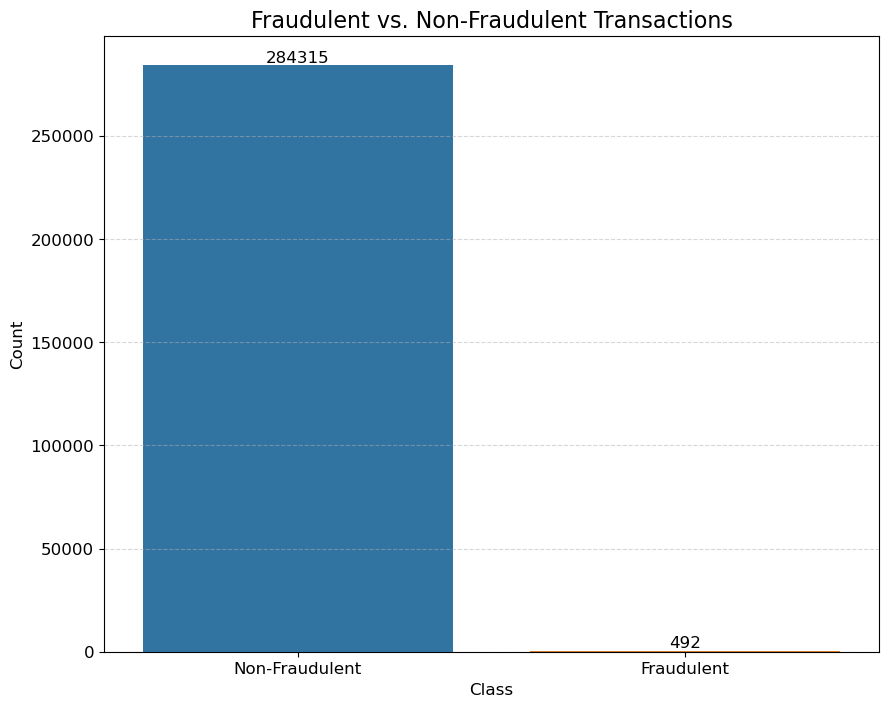

In [16]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=class_counts.index, y=class_counts, palette=['#1f77b4', '#ff7f0e'])
plt.title('Fraudulent vs. Non-Fraudulent Transactions', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add data labels on top of each bar
for index, value in enumerate(class_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

plt.show()

Based on the plot, it is evident that the dataset exhibits significant imbalance, with the majority of transactions falling under the non-fraudulent category (class 0), while only a limited number of transactions belong to the fraudulent category (class 1). This reveals the presence of a class imbalance issue within the dataset, which can potentially impact the effectiveness of a model trained on it. To address this class imbalance problem in the context of developing a fraud detection model, it may be necessary to employ techniques like oversampling, undersampling, or class weighting.

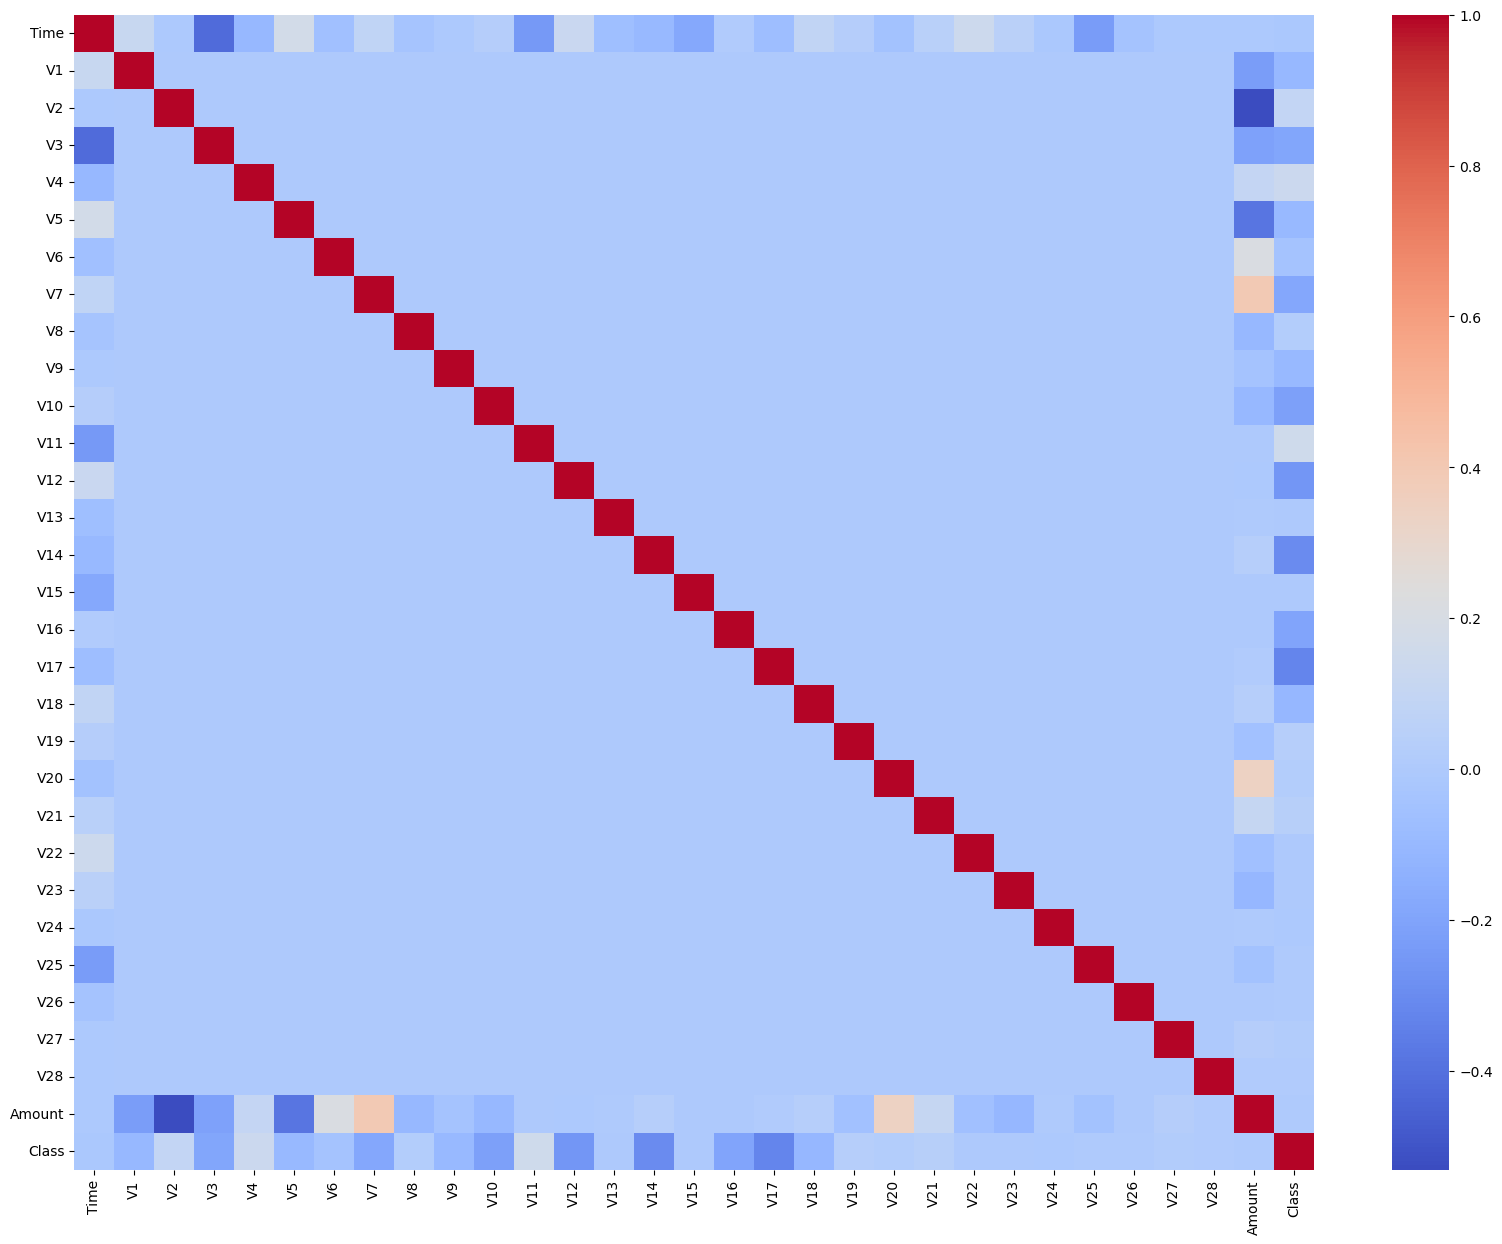

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=False)
plt.show()

Based on the heatmap data, it is evident that there are no prominent positive or negative associations between any variable pairs within the dataset. The most notable correlations are as follows:
- The correlation coefficient between Time and V3 is -0.42.
- The correlation coefficient between Amount and V2 is -0.53.
- The correlation coefficient between Amount and V4 is 0.4.

Although these correlations are relatively strong, the likelihood of encountering multicollinearity is not anticipated to be significant. In general, the heatmap indicates the absence of highly interconnected variables that would necessitate their exclusion before constructing a machine learning model.

## 2.- Models

### Data preparation

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

def prepare_data(df, target_col, test_size=0.2, val_size=0.25, random_state=42):
    # Drop the target column to prepare data for splitting
    X = df.drop(columns=[target_col])
    # Get the target variable
    y = df[target_col]
    
    # Split data into training+validation and test sets, ensuring the class distribution is maintained
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state)
    
    # Further split training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, test_size=val_size, stratify=y_trainval, random_state=random_state)
    
    return X_train, X_val, X_test, y_train, y_val, y_test


def handle_imbalance(X, y, random_state=42):
    # Instantiate RandomUnderSampler (aims to undersample the majority class to match the number of samples in the minority class, thus creating a more balanced dataset.)
    rus = RandomUnderSampler(random_state=random_state)
    
    # Undersample the training set
    X_under, y_under = rus.fit_resample(X, y)
    
    return X_under, y_under


def scale_data(X_train, X_val, X_test):
    # Initialize the StandardScaler object and fit it to the training data
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    # Scale the training, validation, and test sets using the scaler
    X_train_std = scaler.transform(X_train)
    X_val_std = scaler.transform(X_val)
    X_test_std = scaler.transform(X_test)
    
    return X_train_std, X_val_std, X_test_std


# Main process
target_col = 'Class'
X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(df, target_col)

X_train_under, y_train_under = handle_imbalance(X_train, y_train)
X_val_under, y_val_under = handle_imbalance(X_val, y_val)

X_train_std, X_val_std, X_test_std = scale_data(X_train_under, X_val_under, X_test)

### Logistic regression

In [26]:
# Set the type of penalty to be used in the logistic regression
penalty = ['l2']

# Generate the range for the inverse of regularization strength 'C'
C = np.logspace(0, 4, 10)

# Create a dictionary of parameters for grid search
param_grid = {
    'C': C, 
    'penalty': penalty
}

# Initialize a logistic regression model
logistic = LogisticRegression(solver='lbfgs', max_iter=10000)

# Initialize a grid search model
logistic_grid = GridSearchCV(
    logistic, 
    param_grid, 
    cv=5,
    scoring='roc_auc', 
    verbose=10, 
    n_jobs=-1
)

# Fit the grid search model with training data
logistic_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

### Support Vector Machine

In [27]:
C = [1]
gammas = [0.001, 0.1]
param_grid = {'C': C, 'gamma': gammas}

svm_model = svm.SVC(kernel='rbf', probability=True)
svm_grid = GridSearchCV(svm_model, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
svm_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.001, 0.1]}, scoring='roc_auc',
             verbose=10)

### Naive Bayes

In [28]:
gnb = GaussianNB()
gnb_best = gnb.fit(X_train_under, y_train_under)

### Random Forest

In [29]:
param_grid = {
'max_depth': [5, 10, 15],
'max_features': ['sqrt'],
'min_samples_leaf': [10, 20],
'min_samples_split': [2, 5],
'n_estimators': [500, 700]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 3/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 3/5; 1/10] END ...........C=1.0, penalty=l2;, score=0.999 total time=   0.1s
[CV 1/5; 2/10] START C=2.7825594022071245, penalty=l2...........................
[CV 1/5; 2/10] END C=2.7825594022071245, penalty=l2;, score=0.991 total time=   0.0s
[CV 3/5; 2/10] START C=2.7825594022071245, penalty=l2...........................
[CV 3/5; 2/10] END C=2.7825594022071245, penalty=l2;, score=1.000 total time=   0.0s
[CV 5/5; 2/10] START C=2.7825594022071245, penalty=l2...........................
[CV 5/5; 2/10] END C=2.7825594022071245, penalty=l2;, score=0.974 total time=   0.0s
[CV 2/5; 3/10] START C=7.742636826811269, penalty=l2............................
[CV 2/5; 3/10] END C=7.742636826811269, penalty=l2;, score=0.980 total time=   0.1s
[CV 2/5; 4/10] START C=21.544346900318832, penalty=l2...........................
[CV 2/5; 4/10] END C=21.54434690

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [500, 700]},
             scoring='roc_auc', verbose=10)

### Dummy Classifier

In [30]:
dummy = DummyClassifier()
dummy.fit(X_train_under, y_train_under)

DummyClassifier()

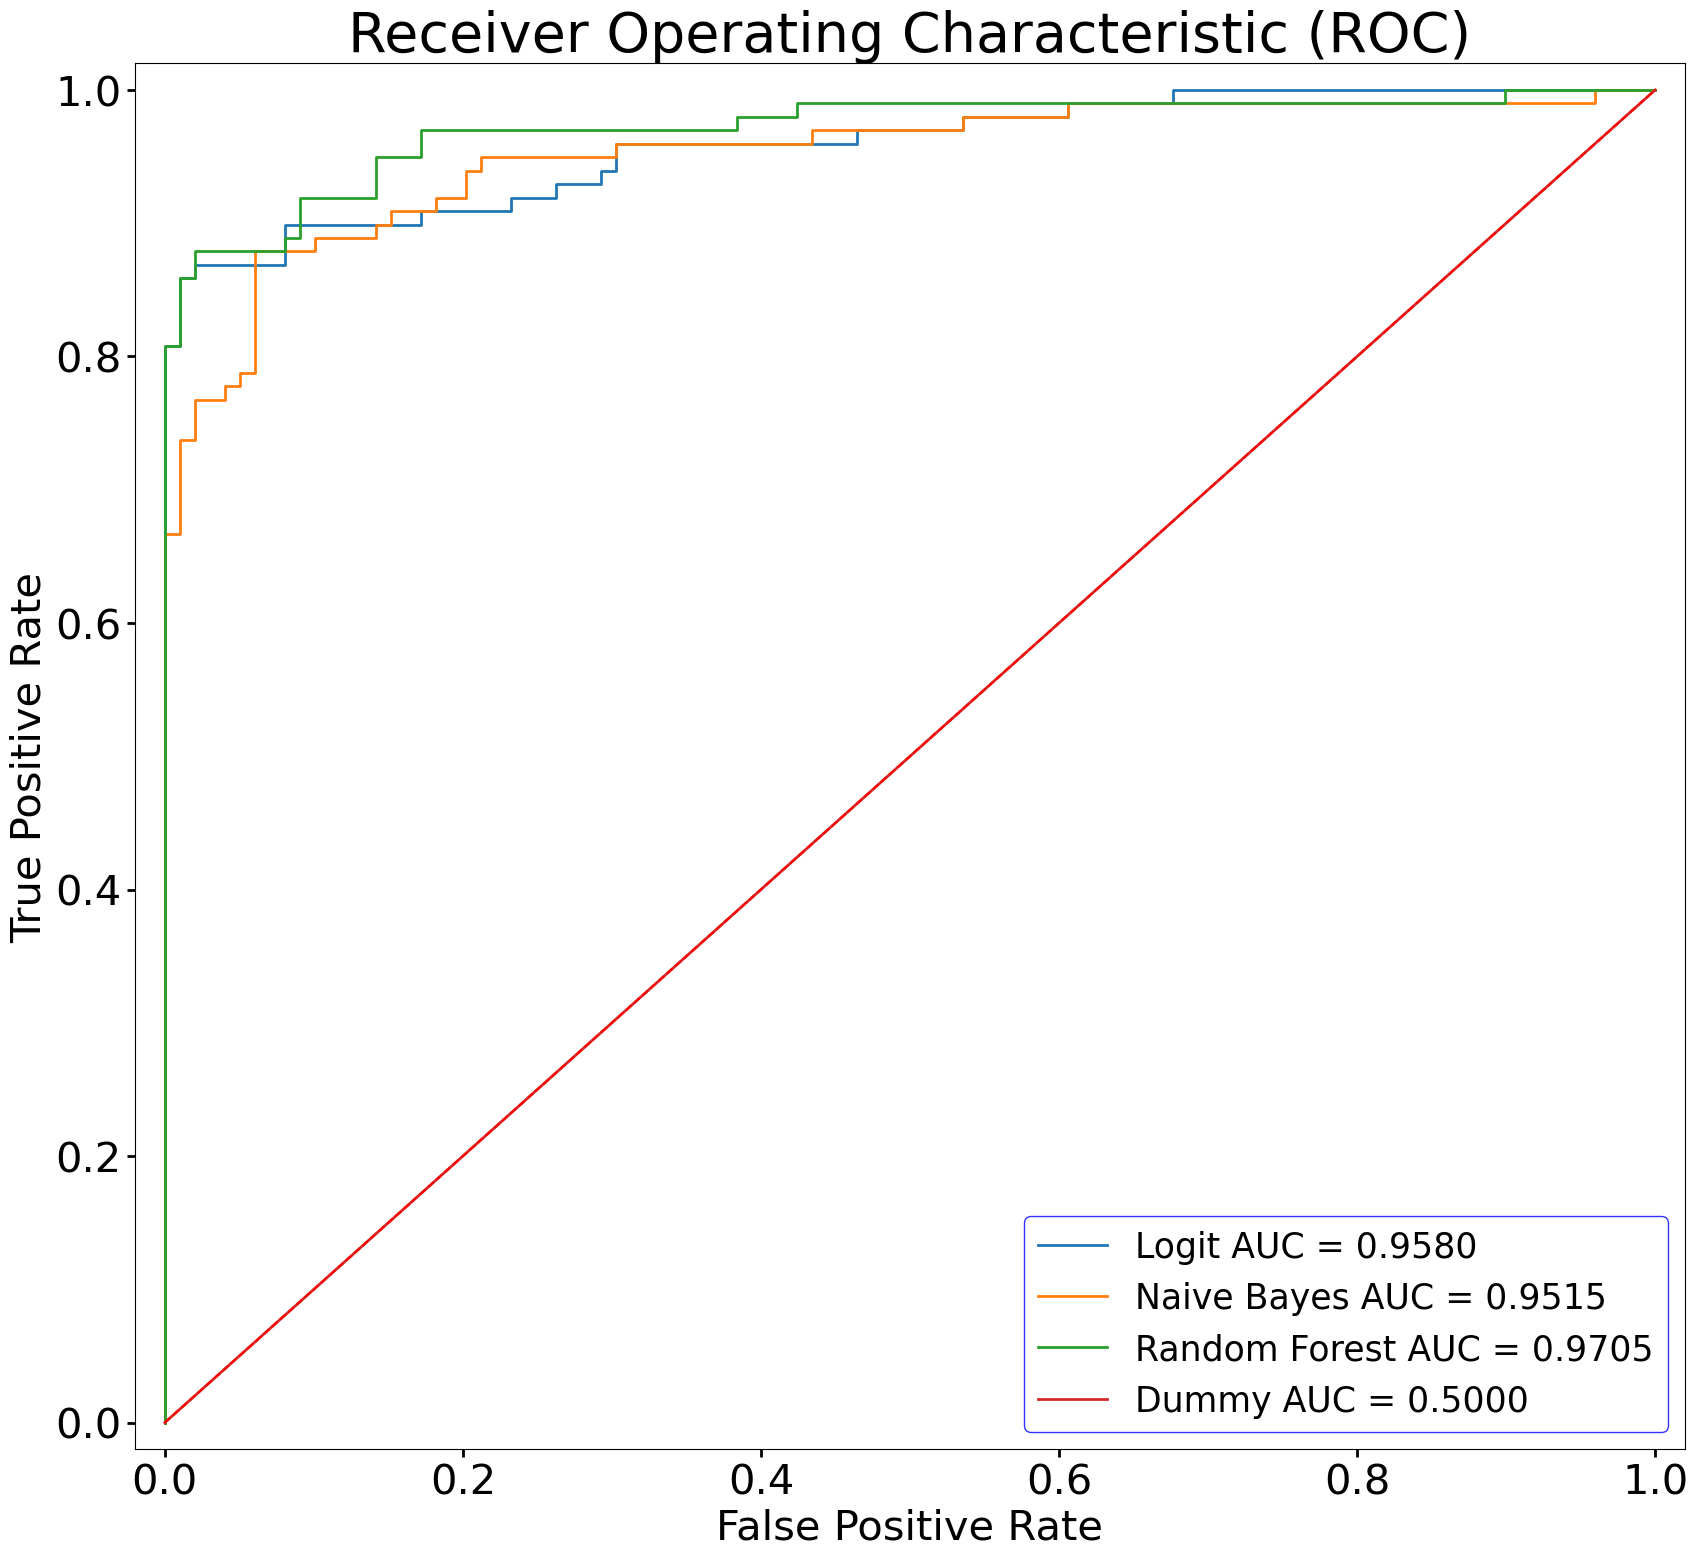

[CV 5/5; 17/24] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.988 total time=   2.7s
[CV 4/5; 18/24] START max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700
[CV 4/5; 18/24] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700;, score=0.958 total time=   2.9s
[CV 3/5; 19/24] START max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500
[CV 3/5; 19/24] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.999 total time=   2.1s
[CV 2/5; 20/24] START max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=700
[CV 2/5; 20/24] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=700;, score=0.978 total time=   2.9s
[CV 1/5; 21/24] START max_depth=15, max_features=sqrt, min_samples_leaf=20, mi

In [31]:
import matplotlib.pyplot as plt
from sklearn import metrics

def plot_and_save_roc_curves(X, y, models, model_names, figsize=(20,18), save_as=None):
    """
    Plots ROC curves for a list of models and save the plot to a file.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): input features for the models
    y (numpy.ndarray or pandas.DataFrame): target variable
    models (list): list of models to compare
    model_names (list): list of model names to display on the plot
    figsize (tuple): size of the figure to display the plot
    save_as (str): name of the file to save the plot

    Returns:
    None
    """
    if len(models) != len(model_names):
        raise ValueError("The number of models and model names must be the same.")

    plt.close('all')
    fig, ax = plt.subplots(figsize=figsize)

    # Loop over models and plot ROC curve
    for i, model in enumerate(models):
        try:
            y_pred = list(model.predict_proba(X)[:, 1])
        except Exception as e:
            print(f"Failed to predict with model {model_names[i]}. Exception: {e}")
            continue

        fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=(model_names[i] + ' AUC = %0.4f' % roc_auc), linewidth=2.0)

    ax.grid(False)
    ax.tick_params(length=6, width=2, labelsize=30, grid_color='r', grid_alpha=0.5)
    leg = plt.legend(loc='lower right', prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=40)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate', fontsize=30)
    plt.xlabel('False Positive Rate', fontsize=30)

    if save_as is not None:
        plt.savefig(save_as)

    plt.show()

# Define the list of models to compare
models = [logistic_grid.best_estimator_, gnb_best, rf_grid.best_estimator_, dummy]
model_names = ['Logit', 'Naive Bayes', 'Random Forest', 'Dummy']

# Plot ROC curves for in-sample data and save it
plot_and_save_roc_curves(X_val_under, y_val_under, models, model_names)


In [32]:
def find_best_threshold(model, num_steps):
    """
    Find the best threshold for a given model.

    :param model: The trained model.
    :param num_steps: The number of thresholds to test.
    :return: The best threshold and corresponding F1 score, accuracy, recall, and precision.
    """
    best_f1 = 0
    best_threshold, best_acc, best_rec, best_pre = 0, 0, 0, 0

    for threshold in np.linspace(0, 1, num_steps):
        y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold)

        f1 = f1_score(y_val_under, y_predict)
        if f1 > best_f1:
            best_threshold, best_f1, best_acc, best_rec, best_pre = threshold, f1, accuracy_score(y_val_under, y_predict), recall_score(y_val_under, y_predict), precision_score(y_val_under, y_predict)

    return best_threshold, best_f1, best_acc, best_rec, best_pre

models = [logistic_grid, gnb_best, rf_grid]
model_names = ["Logistic Regression", "Naive-Bayes", "Random Forest"]

results = []

for model, name in zip(models, model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(model, 20)
    results.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

results_df = pd.DataFrame(results, columns=['Model', 'Best Threshold', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
results_df.to_csv('model_results.csv', index=False)

In [33]:
results_df

,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.736842,0.919786,0.924242,0.868687,0.977273
1,Naive-Bayes,0.052632,0.845714,0.863636,0.747475,0.973684
2,Random Forest,0.421053,0.925532,0.929293,0.878788,0.977528


{'TP': 56856, 'FP': 8, 'FN': 67, 'TN': 31}


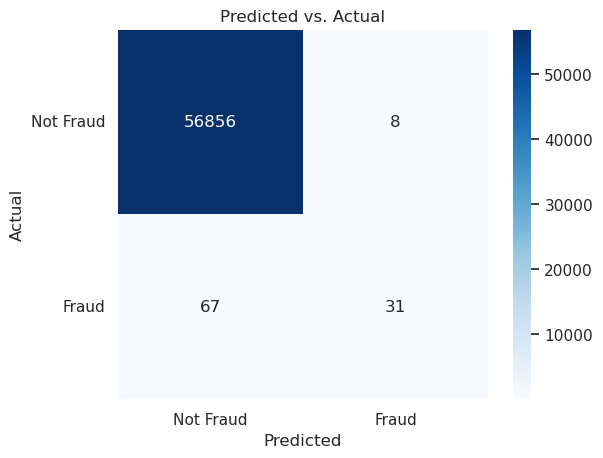

In [35]:
def predict_classes(model, X, threshold=0.5):
    """
    Predicts classes for a given model and threshold.
    Args:
    - model: a trained machine learning model
    - X: input data
    - threshold: threshold for binary classification
    Returns:
    - Array of predicted classes
    """
    return (model.predict_proba(X)[:, 1] >= threshold)

def generate_confusion_matrix(y_true, y_pred):
    """
    Generates a confusion matrix.
    Args:
    - y_true: true labels
    - y_pred: predicted labels
    Returns:
    - Confusion matrix
    """
    return confusion_matrix(y_true, y_pred)

def plot_confusion_matrix(confusion_matrix, labels=['Not Fraud', 'Fraud']):
    """
    Plots a heatmap of the confusion matrix.
    Args:
    - confusion_matrix: a confusion matrix
    - labels: labels for the x and y axes
    Returns: None
    """
    # Plot heatmap of confusion matrix
    plt.figure(dpi=100)
    sns.heatmap(confusion_matrix, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.yticks(rotation=0)
    plt.title('Predicted vs. Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

def confusion_matrix_metrics(confusion_matrix):
    """
    Calculate TP, FP, FN, TN from the confusion matrix.
    Args:
    - confusion_matrix: a confusion matrix
    Returns:
    - A dictionary with TP, FP, FN, TN
    """
    return {
        'TP': confusion_matrix[0][0],
        'FP': confusion_matrix[0][1],
        'FN': confusion_matrix[1][0],
        'TN': confusion_matrix[1][1],
    }

# Example usage:
y_pred = predict_classes(rf_grid, X_test_std, threshold=0.421)
conf_mat = generate_confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat)
metrics = confusion_matrix_metrics(conf_mat)
print(metrics)
